# Market Analysis of Indian Stock Market Comapny 

## Data Loading and File Reading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#import pandas
import pandas as pd

In [4]:
df = pd.read_csv(r"/content/drive/MyDrive/CDAC DBDA Data File/Project Files/NIFTY_50__EQ__INDICES__NSE__MINUTE.csv")

In [5]:
df.head()

timestamp     open     high      low    close  volume
0  2017-01-02 09:15:00+05:30  8210.10  8211.70  8189.00  8189.55     0.0
1  2017-01-02 09:16:00+05:30  8188.75  8193.95  8188.75  8189.95     0.0
2  2017-01-02 09:17:00+05:30  8190.15  8190.75  8173.70  8173.70     0.0
3  2017-01-02 09:18:00+05:30  8173.35  8177.55  8169.15  8177.55     0.0
4  2017-01-02 09:19:00+05:30  8177.85  8178.15  8173.45  8174.40     0.0

In [6]:
df.tail()

timestamp      open      high       low     close  \
370735  2021-01-01 15:25:00+05:30  14023.45  14024.20  14016.35  14019.00   
370736  2021-01-01 15:26:00+05:30  14019.65  14020.60  14015.70  14019.10   
370737  2021-01-01 15:27:00+05:30  14018.60  14019.60  14017.30  14018.15   
370738  2021-01-01 15:28:00+05:30  14017.85  14020.10  14012.85  14015.00   
370739  2021-01-01 15:29:00+05:30  14015.00  14016.35  14011.90  14014.80   

        volume  
370735     0.0  
370736     0.0  
370737     0.0  
370738     0.0  
370739     0.0

# Preprocessing 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370740 entries, 0 to 370739
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   timestamp  370740 non-null  object 
 1   open       370677 non-null  float64
 2   high       370677 non-null  float64
 3   low        370677 non-null  float64
 4   close      370677 non-null  float64
 5   volume     370677 non-null  float64
dtypes: float64(5), object(1)
memory usage: 17.0+ MB


Removing UTC TimeZone from the TimeStamp

In [8]:
#Editing TimeStamp
df["timestamp"] = df["timestamp"].apply(lambda x: x.replace("+05:30",""))

In [9]:
df.head()

timestamp     open     high      low    close  volume
0  2017-01-02 09:15:00  8210.10  8211.70  8189.00  8189.55     0.0
1  2017-01-02 09:16:00  8188.75  8193.95  8188.75  8189.95     0.0
2  2017-01-02 09:17:00  8190.15  8190.75  8173.70  8173.70     0.0
3  2017-01-02 09:18:00  8173.35  8177.55  8169.15  8177.55     0.0
4  2017-01-02 09:19:00  8177.85  8178.15  8173.45  8174.40     0.0

Converting Timestamp to DateTime format 
& setting TimeStamp as Index

In [10]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 370740 entries, 2017-01-02 09:15:00 to 2021-01-01 15:29:00
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   open    370677 non-null  float64
 1   high    370677 non-null  float64
 2   low     370677 non-null  float64
 3   close   370677 non-null  float64
 4   volume  370677 non-null  float64
dtypes: float64(5)
memory usage: 17.0 MB


In [11]:
df.head()

open     high      low    close  volume
timestamp                                                      
2017-01-02 09:15:00  8210.10  8211.70  8189.00  8189.55     0.0
2017-01-02 09:16:00  8188.75  8193.95  8188.75  8189.95     0.0
2017-01-02 09:17:00  8190.15  8190.75  8173.70  8173.70     0.0
2017-01-02 09:18:00  8173.35  8177.55  8169.15  8177.55     0.0
2017-01-02 09:19:00  8177.85  8178.15  8173.45  8174.40     0.0

In [12]:
df.tail()

open      high       low     close  volume
timestamp                                                          
2021-01-01 15:25:00  14023.45  14024.20  14016.35  14019.00     0.0
2021-01-01 15:26:00  14019.65  14020.60  14015.70  14019.10     0.0
2021-01-01 15:27:00  14018.60  14019.60  14017.30  14018.15     0.0
2021-01-01 15:28:00  14017.85  14020.10  14012.85  14015.00     0.0
2021-01-01 15:29:00  14015.00  14016.35  14011.90  14014.80     0.0

**Check missing value in dataset of nifty 50** 

In [13]:
df.isna().sum()

open      63
high      63
low       63
close     63
volume    63
dtype: int64

**Find missing values at diffrent  timestamp**

In [14]:
#Find missing values at diffrent  timestamp
df[df['close'].isnull()].index

DatetimeIndex(['2017-02-21 11:02:00', '2017-02-21 11:03:00',
               '2017-02-21 11:04:00', '2017-02-21 11:05:00',
               '2017-02-21 11:06:00', '2017-02-21 11:07:00',
               '2017-02-21 11:08:00', '2017-02-21 11:09:00',
               '2017-02-21 11:10:00', '2017-02-21 11:11:00',
               '2017-02-21 11:12:00', '2017-02-21 11:13:00',
               '2017-02-21 11:14:00', '2017-02-21 11:15:00',
               '2017-02-21 11:16:00', '2017-02-21 11:17:00',
               '2017-02-21 11:18:00', '2017-02-21 11:19:00',
               '2017-02-21 11:20:00', '2017-02-21 11:21:00',
               '2017-02-21 11:22:00', '2017-02-21 11:23:00',
               '2017-02-21 11:24:00', '2017-02-21 11:25:00',
               '2017-02-21 11:26:00', '2017-02-21 11:27:00',
               '2017-02-21 11:28:00', '2017-02-21 11:29:00',
               '2017-02-21 11:30:00', '2017-02-21 11:31:00',
               '2017-02-21 11:32:00', '2017-02-21 11:33:00',
               '2017-02-

**Fill na values**

In [15]:
#df.fillna(method='ffill',axis=1, inplace=True)
df.ffill(inplace=True)

**Checking na values after ffill method**

In [16]:
df.isna().sum()

open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [17]:
#checking value of na after ffill
df.loc['2017-02-21 11:01:00':'2017-02-21 11:41:00'] 

open     high      low    close  volume
timestamp                                                      
2017-02-21 11:01:00  8869.05  8869.95  8867.95  8868.00     0.0
2017-02-21 11:02:00  8869.05  8869.95  8867.95  8868.00     0.0
2017-02-21 11:03:00  8869.05  8869.95  8867.95  8868.00     0.0
2017-02-21 11:04:00  8869.05  8869.95  8867.95  8868.00     0.0
2017-02-21 11:05:00  8869.05  8869.95  8867.95  8868.00     0.0
2017-02-21 11:06:00  8869.05  8869.95  8867.95  8868.00     0.0
2017-02-21 11:07:00  8869.05  8869.95  8867.95  8868.00     0.0
2017-02-21 11:08:00  8869.05  8869.95  8867.95  8868.00     0.0
2017-02-21 11:09:00  8869.05  8869.95  8867.95  8868.00     0.0
2017-02-21 11:10:00  8869.05  8869.95  8867.95  8868.00     0.0
2017-02-21 11:11:00  8869.05  8869.95  8867.95  8868.00     0.0
2017-02-21 11:12:00  8869.05  8869.95  8867.95  8868.00     0.0
2017-02-21 11:13:00  8869.05  8869.95  8867.95  8868.00     0.0
2017-02-21 11:14:00  8869.05  8869.95  8867.95  8868.00     0.0
2017-02-21 11:15:00  8869.05  8869.95  8867.95  8868.00     0.0
2017-02-21 11:16:00  8869.05  8869.95  8867.95  8868.00     0.0
2017-02-21 11:17:00  8869.05  8869.95  8867.95  8868.00     0.0
2017-02-21 11:18:00  8869.05  8869.95  8867.95  8868.00     0.0
2017-02-21 11:19:00  8869.05  8869.95  8867.95  8868.00     0.0
2017-02-21 11:20:00  8869.05  8869.95  8867.95  8868.00     0.0
2017-02-21 11:21:00  8869.05  8869.95  8867.95  8868.00     0.0
2017-02-21 11:22:00  8869.05  8869.95  8867.95  8868.00     0.0
2017-02-21 11:23:00  8869.05  8869.95  8867.95  8868.00     0.0
2017-02-21 11:24:00  8869.05  8869.95  8867.95  8868.00     0.0
2017-02-21 11:25:00  8869.05  8869.95  8867.95  8868.00     0.0
2017-02-21 11:26:00  8869.05  8869.95  8867.95  8868.00     0.0
2017-02-21 11:27:00  8869.05  8869.95  8867.95  8868.00     0.0
2017-02-21 11:28:00  8869.05  8869.95  8867.95  8868.00     0.0
2017-02-21 11:29:00  8869.05  8869.95  8867.95  8868.00     0.0
2017-02-21 11:30:00  8869.05  8869.95  8867.95  8868.00     0.0
2017-02-21 11:31:00  8869.05  8869.95  8867.95  8868.00     0.0
2017-02-21 11:32:00  8869.05  8869.95  8867.95  8868.00     0.0
2017-02-21 11:33:00  8869.05  8869.95  8867.95  8868.00     0.0
2017-02-21 11:34:00  8869.05  8869.95  8867.95  8868.00     0.0
2017-02-21 11:35:00  8869.05  8869.95  8867.95  8868.00     0.0
2017-02-21 11:36:00  8869.05  8869.95  8867.95  8868.00     0.0
2017-02-21 11:37:00  8869.05  8869.95  8867.95  8868.00     0.0
2017-02-21 11:38:00  8869.05  8869.95  8867.95  8868.00     0.0
2017-02-21 11:39:00  8869.05  8869.95  8867.95  8868.00     0.0
2017-02-21 11:40:00  8869.05  8869.95  8867.95  8868.00     0.0
2017-02-21 11:41:00  8872.50  8872.75  8871.45  8871.85     0.0

In [18]:
df.index
df.close

timestamp
2017-01-02 09:15:00     8189.55
2017-01-02 09:16:00     8189.95
2017-01-02 09:17:00     8173.70
2017-01-02 09:18:00     8177.55
2017-01-02 09:19:00     8174.40
                         ...   
2021-01-01 15:25:00    14019.00
2021-01-01 15:26:00    14019.10
2021-01-01 15:27:00    14018.15
2021-01-01 15:28:00    14015.00
2021-01-01 15:29:00    14014.80
Name: close, Length: 370740, dtype: float64

#EDA Of Dataset

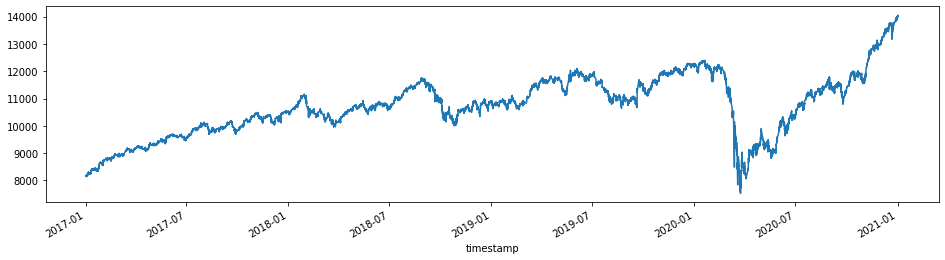

In [19]:
df['close'].plot(figsize=(16,4))

Sudden Drop & Rise in Price was observed in Stock of Nifty-50 b/w the period of Jan-2020 to July-2020 

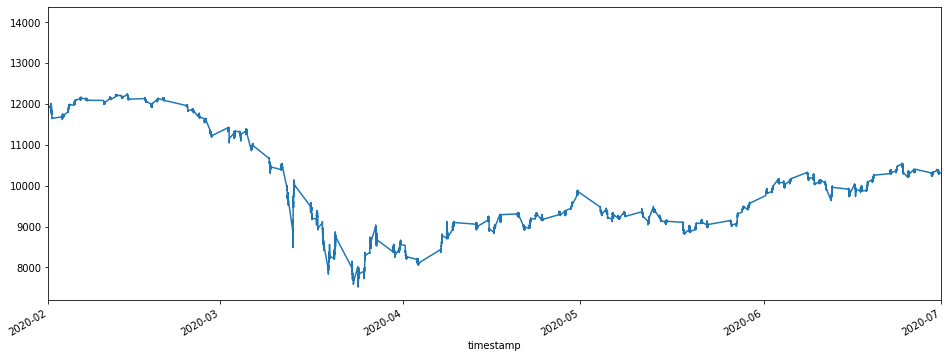

In [20]:
df['close'].plot(xlim=['2020-02-01','2020-07-01'],figsize=(16,6))

Quarterly Histogram of Nifty 50:

Quarterly Change in Price of Closing value of Nifty-50 from Jan-2017 to Jan-2021

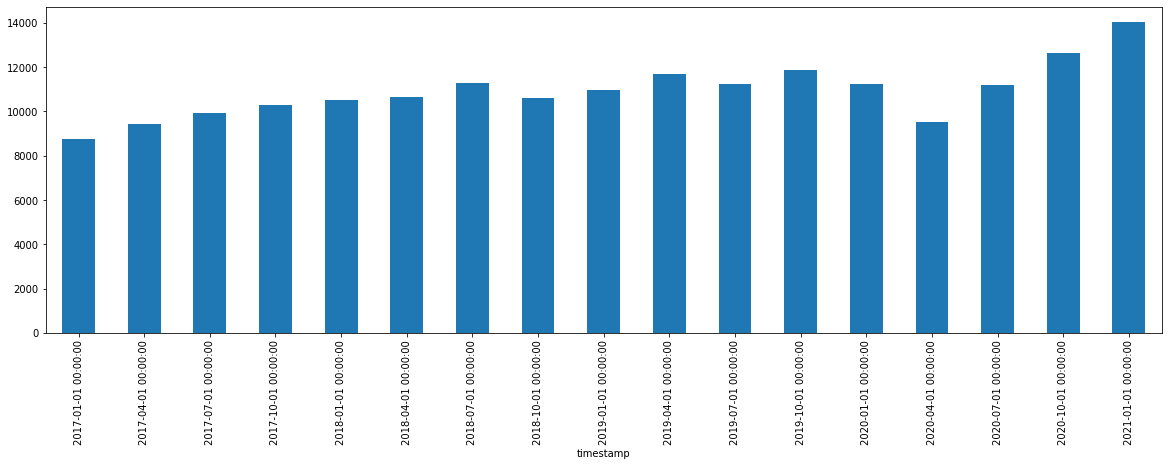

In [21]:
#Quarterly Histogram of Nifty 50 
df['close'].resample(rule='QS').mean().plot(kind='bar',figsize=(20,6))

Describing the whole dataset:

Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution.


In [22]:
df.describe()

open           high            low          close    volume
count  370740.000000  370740.000000  370740.000000  370740.000000  370740.0
mean    10736.398766   10738.670088   10734.103425   10736.357571       0.0
std      1088.901629    1088.854990    1088.901184    1088.889754       0.0
min      7521.250000    7535.800000    7512.250000    7522.350000       0.0
25%     10071.850000   10073.800000   10069.987500   10072.050000       0.0
50%     10772.200000   10774.200000   10769.925000   10772.100000       0.0
75%     11511.300000   11513.750000   11508.462500   11511.250000       0.0
max     14048.050000   14049.800000   14046.600000   14048.100000       0.0


- mean value of nifty 50 stock = 10736.499516
-min value of nifty 50 stock = 7522.350000
-max value of nifty 50 stock = 14048.100000


Min and Max value of nifty 50 with timestamp

In [23]:
print(df[df.close == df.close.min()])
print(df[df.close == df.close.max()])

                        open    high     low    close  volume
timestamp                                                    
2020-03-24 10:25:00  7542.75  7543.2  7519.2  7522.35     0.0
                         open      high       low    close  volume
timestamp                                                         
2021-01-01 14:23:00  14046.90  14048.80  14046.00  14048.1     0.0
2021-01-01 14:24:00  14047.75  14048.75  14046.15  14048.1     0.0


- min value is on 2020-03-24 10:25:00
- max value is on 2021-01-01 14:23:00

**Boxplot**

To find median and outliers

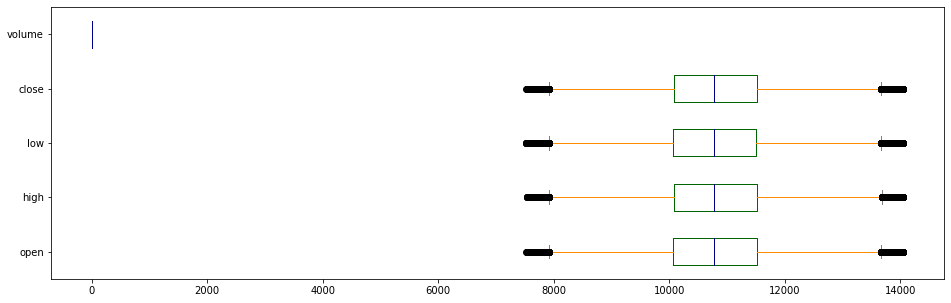

In [24]:
color = {
    "boxes": "DarkGreen",
    "whiskers": "DarkOrange",
    "medians": "DarkBlue",
    "caps": "Gray",
}
df.plot.box(vert=False,color=color,figsize=(16,5))

- Median at approx Rs 11000

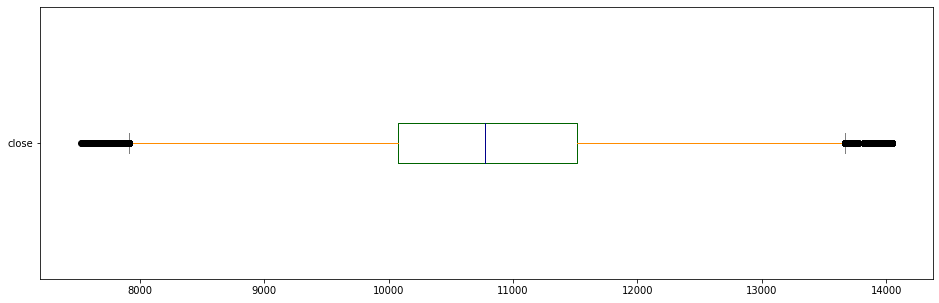

In [25]:
color = {
    "boxes": "DarkGreen",
    "whiskers": "DarkOrange",
    "medians": "DarkBlue",
    "caps": "Gray",
}
df['close'].plot.box(vert=False,color=color,figsize=(16,5))

- Q1 = Rs 10100
- Q2 = Median value of Rs Rs 10900
- Q3 = Rs 11600
- IQR = Q3 - Q1 = Rs 1500
- Min Valid Value = Q1 - 1.5 IQR = Rs 7850
- Max Valid Value = Q3 + 1.5 IQR = Rs 13850
- Outlier = value less than Rs 7850 and more than Rs 13850 

In [26]:
df_new=pd.DataFrame(df.iloc[:,3:4])
df_new

close
timestamp                    
2017-01-02 09:15:00   8189.55
2017-01-02 09:16:00   8189.95
2017-01-02 09:17:00   8173.70
2017-01-02 09:18:00   8177.55
2017-01-02 09:19:00   8174.40
...                       ...
2021-01-01 15:25:00  14019.00
2021-01-01 15:26:00  14019.10
2021-01-01 15:27:00  14018.15
2021-01-01 15:28:00  14015.00
2021-01-01 15:29:00  14014.80

[370740 rows x 1 columns]

**Rolling Average**

Rolling average to smoothen the graph

Smoothing of graph is used to analyse the trend of stock market for short term which helps to decide to buy or sell the stock

10 Min Rolling

In [27]:
df_new['close : 10 min rolling']=df_new['close'].rolling(window=10,min_periods=1).mean()

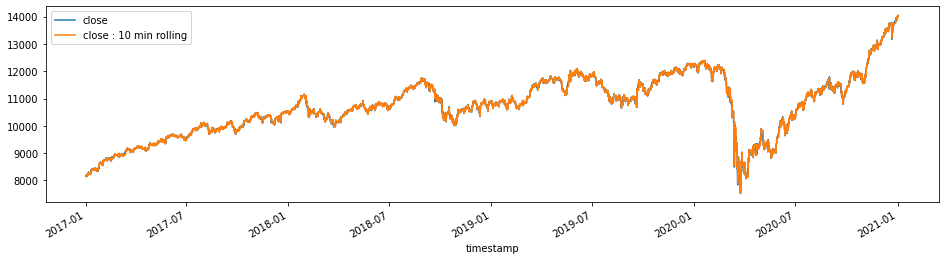

In [28]:
df_new[['close','close : 10 min rolling']].plot(figsize=(16,4))

10 min Rolling of dataset b/w 2020-01-01 & 2020-07-01

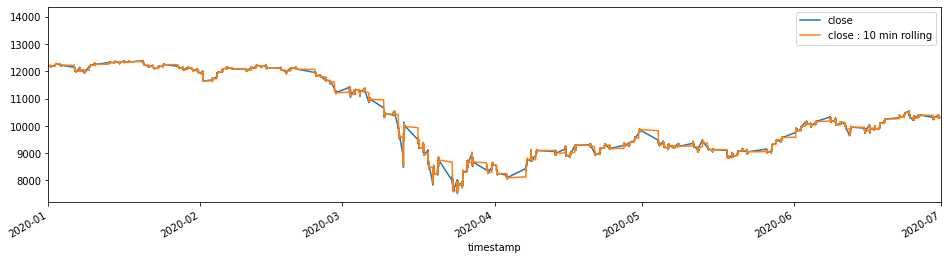

In [29]:
df_new[['close','close : 10 min rolling']].plot(xlim=['2020-01-01','2020-07-01'],figsize=(16,4))

In [30]:
df_new['close : 20 min rolling']=df['close'].rolling(window=20).mean()

In [32]:
df_new['close : 50 min rolling']=df['close'].rolling(window=50).mean()

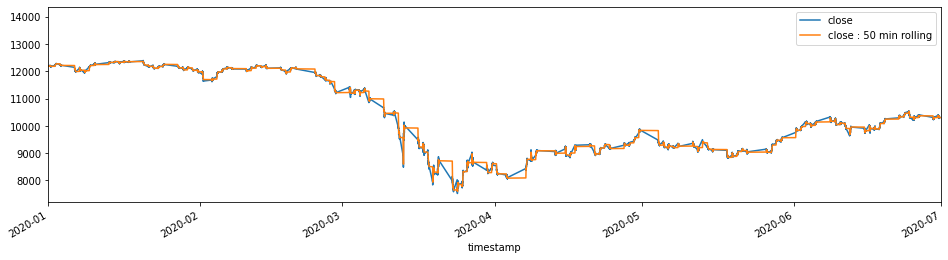

In [33]:
df_new[['close','close : 50 min rolling']].plot(xlim=['2020-01-01','2020-07-01'],figsize=(16,4))

In [34]:
df_new

close  close : 10 min rolling  close : 20 min rolling  \
timestamp                                                                       
2017-01-02 09:15:00   8189.55               8189.5500                     NaN   
2017-01-02 09:16:00   8189.95               8189.7500                     NaN   
2017-01-02 09:17:00   8173.70               8184.4000                     NaN   
2017-01-02 09:18:00   8177.55               8182.6875                     NaN   
2017-01-02 09:19:00   8174.40               8181.0300                     NaN   
...                       ...                     ...                     ...   
2021-01-01 15:25:00  14019.00              14014.3650              14017.0700   
2021-01-01 15:26:00  14019.10              14015.1250              14016.8225   
2021-01-01 15:27:00  14018.15              14016.0750              14016.5900   
2021-01-01 15:28:00  14015.00              14016.3200              14016.1400   
2021-01-01 15:29:00  14014.80              14016.3950              14015.8375   

                     close : 50 min rolling  
timestamp                                    
2017-01-02 09:15:00                     NaN  
2017-01-02 09:16:00                     NaN  
2017-01-02 09:17:00                     NaN  
2017-01-02 09:18:00                     NaN  
2017-01-02 09:19:00                     NaN  
...                                     ...  
2021-01-01 15:25:00               14030.674  
2021-01-01 15:26:00               14030.208  
2021-01-01 15:27:00               14029.737  
2021-01-01 15:28:00               14029.199  
2021-01-01 15:29:00               14028.644  

[370740 rows x 4 columns]

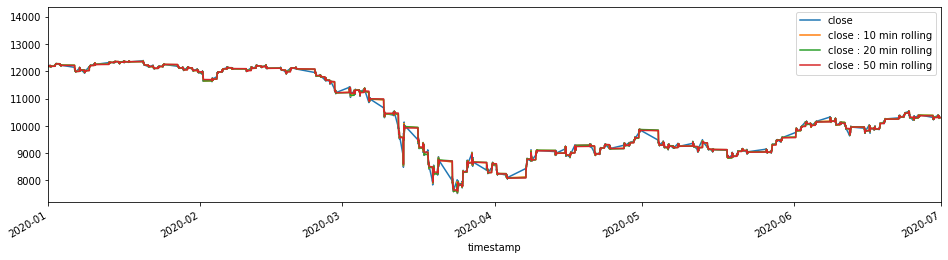

In [35]:
df_new[['close','close : 10 min rolling','close : 20 min rolling','close : 50 min rolling']].plot(xlim=['2020-01-01','2020-07-01'],figsize=(16,4))

**Exponential Wieghted Moving Average**
		
EWMA = alpha * r(t) + (1 -alpha) * EWMA(t-1)	
alpha = 2/n+1

In [36]:
df_new['EMA_0.1']=df_new['close'].ewm(alpha=0.5,adjust=False).mean()

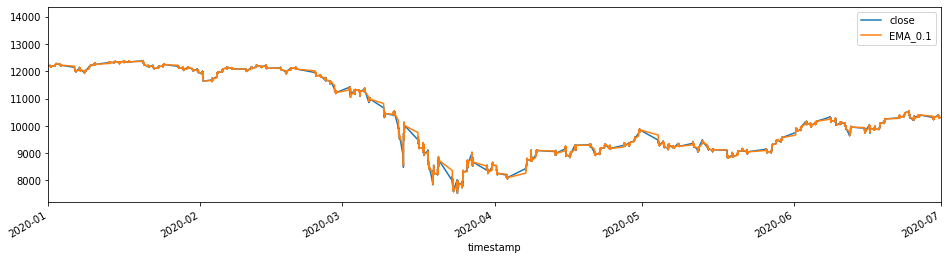

In [37]:
df_new[['close','EMA_0.1']].plot(figsize=(16,4),xlim=['2020-01-01','2020-07-01'])

# Regression Random Forest and Gradient Boosting

In [38]:
df_rfe=pd.DataFrame(df['close'])
df_rfe


close
timestamp                    
2017-01-02 09:15:00   8189.55
2017-01-02 09:16:00   8189.95
2017-01-02 09:17:00   8173.70
2017-01-02 09:18:00   8177.55
2017-01-02 09:19:00   8174.40
...                       ...
2021-01-01 15:25:00  14019.00
2021-01-01 15:26:00  14019.10
2021-01-01 15:27:00  14018.15
2021-01-01 15:28:00  14015.00
2021-01-01 15:29:00  14014.80

[370740 rows x 1 columns]

Creating Features Based on Time Lag Values

In [39]:
df_rfe['close_t_1'] = df_rfe['close'].shift(1) # shift one value below
df_rfe['close_t_2'] = df_rfe['close'].shift(2) # shift one value below
df_rfe['close_t_3'] = df_rfe['close'].shift(3) # shift one value below
df_rfe['close_t_4'] = df_rfe['close'].shift(4) # shift one value below
#df_rfe['close_t_5'] = df_rfe['close'].shift(5) # shift one value below

In [40]:
df_rfe

close  close_t_1  close_t_2  close_t_3  close_t_4
timestamp                                                                
2017-01-02 09:15:00   8189.55        NaN        NaN        NaN        NaN
2017-01-02 09:16:00   8189.95    8189.55        NaN        NaN        NaN
2017-01-02 09:17:00   8173.70    8189.95    8189.55        NaN        NaN
2017-01-02 09:18:00   8177.55    8173.70    8189.95    8189.55        NaN
2017-01-02 09:19:00   8174.40    8177.55    8173.70    8189.95    8189.55
...                       ...        ...        ...        ...        ...
2021-01-01 15:25:00  14019.00   14022.70   14018.20   14018.80   14007.30
2021-01-01 15:26:00  14019.10   14019.00   14022.70   14018.20   14018.80
2021-01-01 15:27:00  14018.15   14019.10   14019.00   14022.70   14018.20
2021-01-01 15:28:00  14015.00   14018.15   14019.10   14019.00   14022.70
2021-01-01 15:29:00  14014.80   14015.00   14018.15   14019.10   14019.00

[370740 rows x 5 columns]

In [41]:
df_rfe.isnull().sum()

close        0
close_t_1    1
close_t_2    2
close_t_3    3
close_t_4    4
dtype: int64

In [42]:
df_rfe.dropna(inplace=True)

In [43]:
Y = df_rfe['close']
X = df_rfe.drop('close',axis=1)

In [44]:
df_rfe.isnull().sum()
df_rfe.isna().sum()

close        0
close_t_1    0
close_t_2    0
close_t_3    0
close_t_4    0
dtype: int64

In [45]:
X.shape,Y.shape

((370736, 4), (370736,))

Taking The last 50000 recent Values of the target

In [46]:
X1=X.iloc[-50001:-1,:]
Y1=Y.iloc[-50001:-1,]

In [47]:
X1.isna().sum()

close_t_1    0
close_t_2    0
close_t_3    0
close_t_4    0
dtype: int64

## Random Forest Regressor model 1

In [48]:
from sklearn.model_selection import train_test_split

X1_train,X1_test,Y1_train,Y1_test = train_test_split(X1,Y1, test_size=0.2, random_state=7)

X1_train.shape,X1_test.shape,Y1_train.shape,Y1_test.shape

((40000, 4), (10000, 4), (40000,), (10000,))

In [49]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
rf = RandomForestRegressor(oob_score=True)

# GridSearch cv

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
param_grids={
    'n_estimators' :  [50,100],
    'criterion' : ['squared_error', 'absolute_error']

}

In [53]:
gscv = GridSearchCV(estimator=rf,param_grid=param_grids,cv = 2, verbose = 2)

In [54]:
#gscv.fit(X1_train,Y1_train)

## Best Parameters

In [55]:
#gscv.best_params_

## Applying Random Forest Regressor with new Parameters

In [56]:
rf_new=RandomForestRegressor(n_estimators=100,criterion='absolute_error')

In [57]:
#rf_new.fit(X1_train,Y1_train)

In [58]:
#Y1_pred_rf=rf_new.predict(X1_test)
#Y1_pred_rf

In [59]:
import pickle as pickle

#Pickle the model
#pickle.dump(rf_new, open('model_rf_1.pkl','wb'))

#Unpickle the model
model_rf_1 = pickle.load(open('/content/drive/MyDrive/CDAC DBDA Data File/Project Files/model_rf_1.pkl','rb'))

Y1_pred_rf = model_rf_1.predict(X1_test)

## Evaluating Parameters 

In [60]:
def eval_r2Error(X,Y):
    r2_adj=1 - (1-rf_new.score(X,Y))*(len(Y)-1)/(len(Y)-X.shape[1]-1)
    return r2_adj

In [61]:
def eval_fun(Y_test,Y_pred):
    from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
    r2 = r2_score(Y_test,Y_pred)
    mse = mean_squared_error(Y_test,Y_pred)
    mae = mean_absolute_error(Y_test,Y_pred)
    return r2, mse, mae

In [62]:
r2, mse, mae = eval_fun(Y1_test,Y1_pred_rf) 
print("r2 score = ", r2, "mse = ", mse, " mae =", mae)
#r2_adj=eval_r2Error(X1,Y1)
#print("r2_adjusted=", r2_adj)


r2 score =  0.9999568167064791 mse =  41.336851645730725  mae = 4.098979074999952


#Gradient Bossting Regressor model 2

In [63]:
from sklearn.ensemble import GradientBoostingRegressor

In [64]:
gbr = GradientBoostingRegressor()

In [65]:
param_grids={
    'loss' : ['squared_error', 'absolute_error'],
    'n_estimators' : [50,100],
    'criterion' : ['friedman_mse','squared_error']
}

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
gscv_gbr=GridSearchCV(estimator=gbr,param_grid=param_grids,cv = 2,verbose = 2)

In [68]:
gscv_gbr.fit(X1_train,Y1_train)

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV] END criterion=friedman_mse, loss=squared_error, n_estimators=50; total time=   2.0s
[CV] END criterion=friedman_mse, loss=squared_error, n_estimators=50; total time=   1.9s
[CV] END criterion=friedman_mse, loss=squared_error, n_estimators=100; total time=   3.8s
[CV] END criterion=friedman_mse, loss=squared_error, n_estimators=100; total time=   3.8s
[CV] END criterion=friedman_mse, loss=absolute_error, n_estimators=50; total time=   2.2s
[CV] END criterion=friedman_mse, loss=absolute_error, n_estimators=50; total time=   2.1s
[CV] END criterion=friedman_mse, loss=absolute_error, n_estimators=100; total time=   4.4s
[CV] END criterion=friedman_mse, loss=absolute_error, n_estimators=100; total time=   4.4s
[CV] END criterion=squared_error, loss=squared_error, n_estimators=50; total time=   1.8s
[CV] END criterion=squared_error, loss=squared_error, n_estimators=50; total time=   1.8s
[CV] END criterion=squared_error, loss=s

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'loss': ['squared_error', 'absolute_error'],
                         'n_estimators': [50, 100]},
             verbose=2)

## Best Parameters

In [69]:
#gscv_gbr.best_params_

## Applying Gradient Boosting Regressor with new parameters

In [70]:
gbr_new = GradientBoostingRegressor(criterion='squared_error',loss='squared_error',n_estimators=100)

In [71]:
#gbr_new.fit(X1_train,Y1_train)

In [72]:
#Y1_pred_gbr=gbr_new.predict(X1_test)
#Y1_pred_gbr

In [73]:
#import pickle as pickle

#Pickle the model
#pickle.dump(gbr_new, open('model_gbr_1.pkl','wb'))

#Unpickle the model
model_gbr_1 = pickle.load(open('/content/drive/MyDrive/CDAC DBDA Data File/Project Files/model_gbr_1.pkl','rb'))

Y1_pred_gbr = model_gbr_1.predict(X1_test)
Y1_pred_gbr

array([11848.57552843, 11745.71606184, 13706.18758833, ...,
       10788.53969392, 11758.10056336, 13244.07877488])

## Evaluating Parameter

In [74]:
def eval_r2Error(X,Y):
    r2_adj=1 - (1-rf_new.score(X,Y))*(len(Y)-1)/(len(Y)-X.shape[1]-1)
    return r2_adj

In [75]:
def eval_fun(Y_test,Y_pred):
    from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
    r2 = r2_score(Y_test,Y_pred)
    mse = mean_squared_error(Y_test,Y_pred)
    mae = mean_absolute_error(Y_test,Y_pred)
    return r2, mse, mae

In [76]:
r2, mse, mae = eval_fun(Y1_test,Y1_pred_gbr) 
print("r2 score = ", r2, "mse = ", mse, " mae =", mae)
#r2_adj=eval_r2Error(X1_test,Y1_pred_gbr)
#print("r2_adjusted=", r2_adj)


r2 score =  0.9999186643515354 mse =  77.85787882214645  mae = 6.222007116173975


## Comparing Y_test with Y_pred_rf and Y_pred_gbr

In [77]:
res = pd.DataFrame([Y1_test.values, Y1_pred_rf, Y1_pred_gbr]).T
res.columns = ['Y1_test', 'Y1_pred_rf', 'Y1_pred_gbr']
res.shape

(10000, 3)

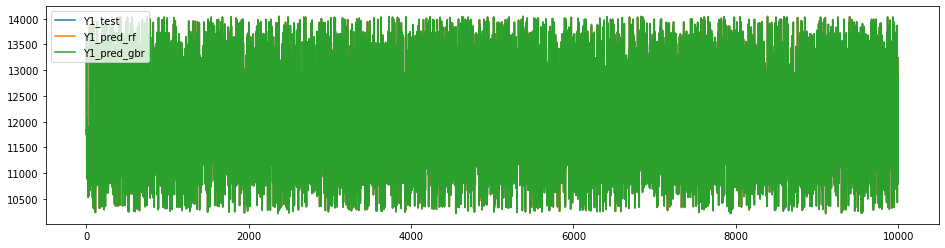

In [78]:
res.plot(figsize=(16,4))

In [79]:
res.head()

Y1_test  Y1_pred_rf   Y1_pred_gbr
0  11845.35  11848.2570  11848.575528
1  11746.70  11745.4645  11745.716062
2  13696.00  13698.4970  13706.187588
3  10910.55  10911.5935  10928.679882
4  10905.70  10902.8220  10885.888732

In [80]:
len(Y1_pred_gbr)

10000

In [81]:
#create dataframe with Y_pred_rf Y_pred_gbr

In [82]:
#df_userInput = pd.DataFrame(df_userInput,Y_pred_rf,Y_pred_gbr)

**Exponential wieghted moving average**

In [83]:
#Exponential wieghted moving average 
df_ewma=pd.DataFrame(df['close'])


#Using EWM for Random Forest Regressor trial model 1

In [84]:
#19min
df_ewma['close 0.1']=df_ewma['close'].ewm(alpha=0.1).mean()
#9min
df_ewma['close 0.2']=df_ewma['close'].ewm(alpha=0.2).mean()

#df_ewma['close 0.3']=df_ewma['close'].ewm(alpha=0.3).mean()

#df_ewma['close 0.4']=df_ewma['close'].ewm(alpha=0.4).mean()

df_ewma

close     close 0.1     close 0.2
timestamp                                                
2017-01-02 09:15:00   8189.55   8189.550000   8189.550000
2017-01-02 09:16:00   8189.95   8189.760526   8189.772222
2017-01-02 09:17:00   8173.70   8183.834133   8183.185246
2017-01-02 09:18:00   8177.55   8182.006819   8181.276287
2017-01-02 09:19:00   8174.40   8180.149277   8179.230747
...                       ...           ...           ...
2021-01-01 15:25:00  14019.00  14018.724416  14016.927681
2021-01-01 15:26:00  14019.10  14018.761974  14017.362145
2021-01-01 15:27:00  14018.15  14018.700777  14017.519716
2021-01-01 15:28:00  14015.00  14018.330699  14017.015773
2021-01-01 15:29:00  14014.80  14017.977629  14016.572618

[370740 rows x 3 columns]

In [85]:
Y_ewma = df_ewma['close']
X_ewma = df_ewma.drop('close',axis=1)

In [86]:
X_ewma.head()
Y_ewma.head()

timestamp
2017-01-02 09:15:00    8189.55
2017-01-02 09:16:00    8189.95
2017-01-02 09:17:00    8173.70
2017-01-02 09:18:00    8177.55
2017-01-02 09:19:00    8174.40
Name: close, dtype: float64

In [87]:
X2=X_ewma.iloc[-10001:-1,:]
Y2=Y_ewma.iloc[-10001:-1,]

In [88]:
Y2.isna().sum()

0

In [89]:
X2.shape,Y2.shape

((10000, 2), (10000,))

##Train Test Split

In [90]:
from sklearn.model_selection import train_test_split

X2_train,X2_test,Y2_train,Y2_test = train_test_split(X2,Y2, test_size=0.2, random_state=7)

X2_train.shape,X2_test.shape,Y2_train.shape,Y2_test.shape

((8000, 2), (2000, 2), (8000,), (2000,))

##Random Forest Regressor

In [91]:
from sklearn.ensemble import RandomForestRegressor

In [92]:
rf = RandomForestRegressor(oob_score=True)

In [93]:
from sklearn.model_selection import GridSearchCV

##GridSrearch CV

In [94]:
param_grids={
    'n_estimators' :  [50,100],#150],
    'criterion' : ['squared_error', 'absolute_error']# 'poisson'],
    #'max_features' : ['sqrt','log2'],
    #'max_sample' : [0.5,0.7,0.9],

}

In [95]:
gscv_ewm = GridSearchCV(estimator=rf,param_grid=param_grids,cv = 2, verbose = 2)

In [96]:
#gscv_ewm.fit(X2_train,Y2_train)

##Best Parameter

In [97]:
#gscv_ewm.best_params_

In [98]:
rf_ewm=RandomForestRegressor(n_estimators=50,criterion='absolute_error')

In [99]:
#rf_ewm.fit(X2_train,Y2_train)

In [100]:
#Y2_pred_ewm = rf_ewm.predict(X2_test)
#Y2_pred_ewm

In [101]:
import pickle as pickle

#Pickle the model
#pickle.dump(rf_ewm, open('model_ewm.pkl','wb'))

#Unpickle the model
model_ewm = pickle.load(open('/content/drive/MyDrive/CDAC DBDA Data File/Project Files/model_ewm.pkl','rb'))

Y2_pred_ewm = model_ewm.predict(X2_test)

In [102]:
def eval_r2Error(X,Y):
    r2_adj=1 - (1-rf_new.score(X,Y))*(len(Y)-1)/(len(Y)-X.shape[1]-1)
    return r2_adj

In [103]:
def eval_fun(Y_test,Y_pred):
    from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
    r2 = r2_score(Y_test,Y_pred)
    mse = mean_squared_error(Y_test,Y_pred)
    mae = mean_absolute_error(Y_test,Y_pred)
    return r2, mse, mae

In [104]:
r2, mse, mae = eval_fun(Y2_test,Y2_pred_ewm) 
print("r2 score = ", r2, "mse = ", mse, " mae =", mae)
#r2_adj=eval_r2Error(X2,Y2)
#print("r2_adjusted=", r2_adj)


r2 score =  0.9993493748817293 mse =  68.58849811275192  mae = 4.39180600000019


##Using lag values for Random Forest Regressor model 3

In [105]:
df_1 = pd.DataFrame(df.iloc[:,3:4])

In [106]:
df_1= df_1.iloc[-50001:-1,:].copy()

Shifting Lag value by 374 min

In [107]:
df_1['close t_1'] = df_1['close'].shift(374)

In [108]:
df_1

close  close t_1
timestamp                               
2020-06-24 14:24:00  10410.25        NaN
2020-06-24 14:25:00  10416.45        NaN
2020-06-24 14:26:00  10408.75        NaN
2020-06-24 14:27:00  10404.50        NaN
2020-06-24 14:28:00  10407.30        NaN
...                       ...        ...
2021-01-01 15:24:00  14022.70   13975.15
2021-01-01 15:25:00  14019.00   13978.15
2021-01-01 15:26:00  14019.10   13978.45
2021-01-01 15:27:00  14018.15   13967.40
2021-01-01 15:28:00  14015.00   13967.00

[50000 rows x 2 columns]

In [109]:
df_1.isnull().sum()

close          0
close t_1    374
dtype: int64

In [110]:
df_1.dropna(inplace=True)
df_1.isnull().sum()

close        0
close t_1    0
dtype: int64

In [111]:
df_1

close  close t_1
timestamp                               
2020-06-25 14:23:00  10344.50   10410.25
2020-06-25 14:24:00  10350.20   10416.45
2020-06-25 14:25:00  10353.85   10408.75
2020-06-25 14:26:00  10348.50   10404.50
2020-06-25 14:27:00  10336.30   10407.30
...                       ...        ...
2021-01-01 15:24:00  14022.70   13975.15
2021-01-01 15:25:00  14019.00   13978.15
2021-01-01 15:26:00  14019.10   13978.45
2021-01-01 15:27:00  14018.15   13967.40
2021-01-01 15:28:00  14015.00   13967.00

[49626 rows x 2 columns]

In [112]:
Y_rf = df_1['close']
X_rf = df_1.drop('close',axis=1)

In [113]:
X_rf.shape,Y_rf.shape

((49626, 1), (49626,))

In [114]:
from sklearn.model_selection import train_test_split

X_rf_train,X_rf_test,Y_rf_train,Y_rf_test = train_test_split(X_rf,Y_rf, test_size=0.2, random_state=7)

X_rf_train.shape,X_rf_test.shape,Y_rf_train.shape,Y_rf_test.shape

((39700, 1), (9926, 1), (39700,), (9926,))

In [115]:
from sklearn.ensemble import RandomForestRegressor

In [116]:
rf = RandomForestRegressor(oob_score=True)

In [117]:
from sklearn.model_selection import GridSearchCV

In [118]:
param_grids={
    'n_estimators' :  [50,100],#150],
    'criterion' : ['squared_error', 'absolute_error']# 'poisson'],
    #'max_features' : ['sqrt','log2'],
    #'max_sample' : [0.5,0.7,0.9],

}

In [119]:
gscv_rf = GridSearchCV(estimator=rf,param_grid=param_grids,cv = 2, verbose = 2)

In [120]:
#gscv_rf.fit(X_rf_train,Y_rf_train)

In [121]:
#gscv_rf.best_params_

In [122]:
rf_1=RandomForestRegressor(n_estimators=100,criterion='absolute_error')

In [123]:
#rf_1.fit(X_rf_train,Y_rf_train)

In [124]:
#Y_rf_pred = rf_1.predict(X_rf_test)

In [125]:
import pickle as pickle

#Pickle the model
#pickle.dump(rf_1, open('model_rf_2.pkl','wb'))

#Unpickle the model
model_rf_2 = pickle.load(open('/content/drive/MyDrive/CDAC DBDA Data File/Project Files/model_rf_2.pkl','rb'))

Y_rf_pred = model_rf_2.predict(X_rf_test)

##Evaluating Parameter

In [126]:
def eval_r2Error(X,Y):
    r2_adj=1 - (1-rf_new.score(X,Y))*(len(Y)-1)/(len(Y)-X.shape[1]-1)
    return r2_adj

In [127]:
def eval_fun(Y_test,Y_pred):
    from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
    r2 = r2_score(Y_test,Y_pred)
    mse = mean_squared_error(Y_test,Y_pred)
    mae = mean_absolute_error(Y_test,Y_pred)
    return r2, mse, mae

In [128]:
r2, mse, mae = eval_fun(Y_rf_test,Y_rf_pred) 
print("r2 score = ", r2, "mse = ", mse, " mae =", mae)
#r2_adj = eval_r2Error(X_rf,Y_rf)
#print("r2_adjusted=", r2_adj)


r2 score =  0.9862245479550005 mse =  12984.582810014559  mae = 80.9774660487609


# Using lag values for Gradient Boosting Algorithm model 4

In [129]:
from sklearn.ensemble import GradientBoostingRegressor

In [130]:
gbr = GradientBoostingRegressor()

In [131]:
param_grids={
    'loss' : ['squared_error', 'absolute_error'],
    'n_estimators' : [50,100],#150]
    'criterion' : ['friedman_mse','squared_error']#'mse']
}

In [132]:
from sklearn.model_selection import GridSearchCV

In [133]:
gscv_gbr=GridSearchCV(estimator=gbr,param_grid=param_grids,cv = 2,verbose = 2)

In [134]:
#gscv_gbr.fit(X_rf_train,Y_rf_train)

In [135]:
#gscv_gbr.best_params_

In [136]:
gbr_new_2 = GradientBoostingRegressor(criterion='friedman_mse',loss='squared_error',n_estimators=100)

In [137]:
#gbr_new_2.fit(X_rf_train,Y_rf_train)

In [138]:
#Y_gbr_pred = gbr_new_2.predict(X_rf_test)

In [139]:
import pickle as pickle

#Pickle the model
#pickle.dump(gbr_new_2, open('model_gbr_2.pkl','wb'))

#Unpickle the model
model_gbr_2 = pickle.load(open('/content/drive/MyDrive/CDAC DBDA Data File/Project Files/model_gbr_2 (1).pkl','rb'))

Y_gbr_pred = model_gbr_2.predict(X_rf_test)

##Evaluating Parameter

In [140]:
def eval_r2Error(X,Y):
    r2_adj=1 - (1-rf_new.score(X,Y))*(len(Y)-1)/(len(Y)-X.shape[1]-1)
    return r2_adj

In [141]:
def eval_fun(Y_test,Y_pred):
    from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
    r2 = r2_score(Y_test,Y_pred)
    mse = mean_squared_error(Y_test,Y_pred)
    mae = mean_absolute_error(Y_test,Y_pred)
    return r2, mse, mae

In [142]:
r2, mse, mae = eval_fun(Y_rf_test,Y_rf_pred) 
print("r2 score = ", r2, "mse = ", mse, " mae =", mae)
#r2_adj=eval_r2Error(X2,Y2)
#print("r2_adjusted=", r2_adj)


r2 score =  0.9862245479550005 mse =  12984.582810014559  mae = 80.9774660487609


# Compare Diffrent Models of Random Forest and Gradient Boosting Regressor 

- "Model 1 of Random Forest Regressor", Y1_pred_rf
- "Model 2 of Gradient Boosting Regressor ", Y1_pred_gbr
- "Trial Model 1 of Exponential Wieghted Moving Average",Y2_pred_ewm 
- "Model 3 of Random Forest Regressor", Y_rf_pred 
- "Model 4 of Gradient Boosting Regressor",Y_gbr_pred

In [143]:
compare_prediction= pd.DataFrame([Y1_test.values, Y1_pred_rf, Y1_pred_gbr,Y_rf_pred,Y_gbr_pred]).T
compare_prediction.columns = ['Y1_test', 'Y1_pred_rf', 'Y1_pred_gbr','Y_rf_pred','Y_gbr_pred']
compare_prediction.shape

(10000, 5)

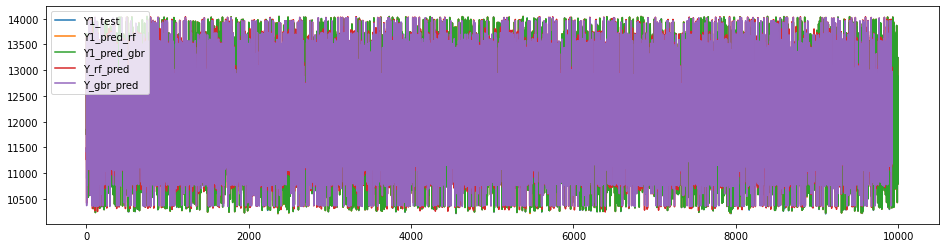

In [144]:
compare_prediction.plot(figsize=(16,4))

In [145]:
compare_prediction

Y1_test  Y1_pred_rf   Y1_pred_gbr    Y_rf_pred    Y_gbr_pred
0     11845.35  11848.2570  11848.575528  13647.91850  13621.126291
1     11746.70  11745.4645  11745.716062  11259.14700  11409.928039
2     13696.00  13698.4970  13706.187588  11502.36075  11496.704554
3     10910.55  10911.5935  10928.679882  10418.76300  10370.400520
4     10905.70  10902.8220  10885.888732  13544.45050  13532.784769
...        ...         ...           ...          ...           ...
9995  11915.30  11913.4985  11907.824089          NaN           NaN
9996  12006.40  12004.5275  12014.250085          NaN           NaN
9997  10787.40  10788.3155  10788.539694          NaN           NaN
9998  11772.30  11764.8135  11758.100563          NaN           NaN
9999  13240.35  13241.3735  13244.078775          NaN           NaN

[10000 rows x 5 columns]

#Applying FBProphet model 5

In [146]:
from prophet import Prophet

In [147]:
df_fb = df['close'].copy()

In [148]:
df_fb = pd.DataFrame(df_fb.iloc[-50001:-1,] )

In [149]:
df_fb.reset_index(inplace=True)

In [150]:
df_fb.head()

timestamp     close
0 2020-06-24 14:24:00  10410.25
1 2020-06-24 14:25:00  10416.45
2 2020-06-24 14:26:00  10408.75
3 2020-06-24 14:27:00  10404.50
4 2020-06-24 14:28:00  10407.30

**Renaming Columns**

In [151]:
df_fb.rename(columns={'timestamp': 'ds', 'close': 'y'}, inplace=True)

Train Model

In [152]:
# Python
model = Prophet()
#model.fit(df_fb)

Pickling the trained model

In [153]:
import pickle as pickle

#Pickle the model
#pickle.dump(model, open('model_fb.pkl','wb'))

#Unpickle the model
model = pickle.load(open('/content/drive/MyDrive/CDAC DBDA Data File/Project Files/model_fb.pkl','rb'))

Creating Future DataFrame

In [154]:
# Python
future = model.make_future_dataframe(periods=15)
future.tail(20)

ds
49993 2021-01-01 15:22:00
49994 2021-01-01 15:23:00
49995 2021-01-01 15:24:00
49996 2021-01-01 15:25:00
49997 2021-01-01 15:26:00
49998 2021-01-02 15:26:00
49999 2021-01-03 15:26:00
50000 2021-01-04 15:26:00
50001 2021-01-05 15:26:00
50002 2021-01-06 15:26:00
50003 2021-01-07 15:26:00
50004 2021-01-08 15:26:00
50005 2021-01-09 15:26:00
50006 2021-01-10 15:26:00
50007 2021-01-11 15:26:00
50008 2021-01-12 15:26:00
50009 2021-01-13 15:26:00
50010 2021-01-14 15:26:00
50011 2021-01-15 15:26:00
50012 2021-01-16 15:26:00

In [155]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
50008 2021-01-12 15:26:00  14271.801612  13673.558287  14855.206958
50009 2021-01-13 15:26:00  14307.776869  13591.024076  14992.766382
50010 2021-01-14 15:26:00  14340.579687  13532.271928  15129.434746
50011 2021-01-15 15:26:00  14368.398894  13483.115222  15274.818403
50012 2021-01-16 15:26:00  14631.288007  13611.461689  15660.796890

Plot Graph of close value of Nifty 50 stock

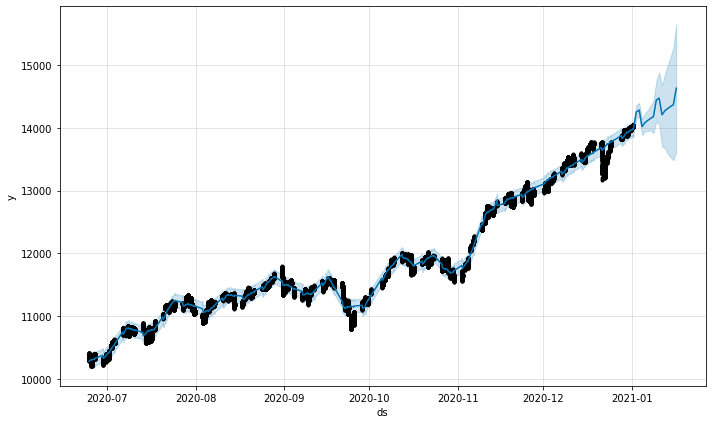

In [156]:
fig1 = model.plot(forecast)

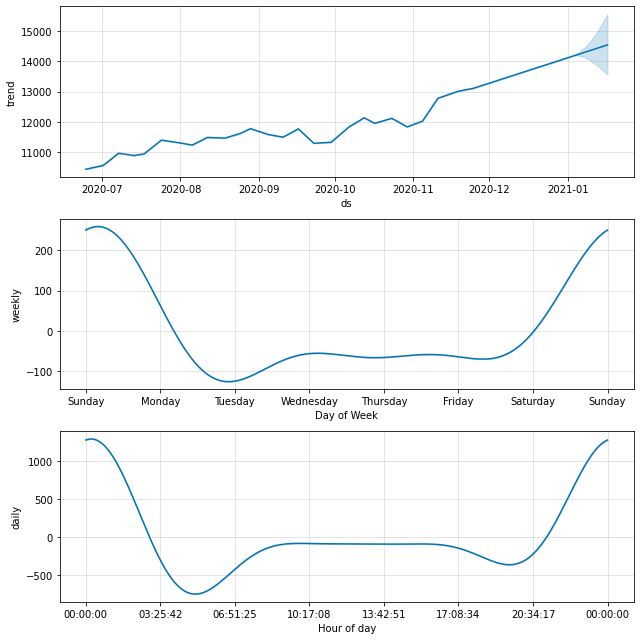

In [157]:
fig2 = model.plot_components(forecast)

In [158]:
# Python
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)

In [159]:
metric_df = forecast.set_index('ds')[['yhat']].join(df_fb.set_index('ds').y).reset_index()

In [160]:
metric_df

ds          yhat         y
0     2020-06-24 14:24:00  10282.459273  10410.25
1     2020-06-24 14:25:00  10282.478717  10416.45
2     2020-06-24 14:26:00  10282.499904  10408.75
3     2020-06-24 14:27:00  10282.522814  10404.50
4     2020-06-24 14:28:00  10282.547427  10407.30
...                   ...           ...       ...
50008 2021-01-12 15:26:00  14271.801612       NaN
50009 2021-01-13 15:26:00  14307.776869       NaN
50010 2021-01-14 15:26:00  14340.579687       NaN
50011 2021-01-15 15:26:00  14368.398894       NaN
50012 2021-01-16 15:26:00  14631.288007       NaN

[50013 rows x 3 columns]

Checking for null values

In [161]:
metric_df.isnull().sum()

ds       0
yhat     0
y       15
dtype: int64

In [162]:
metric_df.dropna(inplace=True)

##Evaluating Paramters

In [163]:
from sklearn.metrics import r2_score

In [164]:
def eval_fun(Y_test,Y_pred):
    from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
    r2 = r2_score(Y_test,Y_pred)
    mse = mean_squared_error(Y_test,Y_pred)
    mae = mean_absolute_error(Y_test,Y_pred)
    return r2, mse, mae

In [165]:
r2_fb,mse_fb,mae_fb = eval_fun(metric_df.y,metric_df.yhat)
print("r2 score = ", r2, "mse = ", mse, " mae =", mae)

r2 score =  0.9862245479550005 mse =  12984.582810014559  mae = 80.9774660487609


# Applying LSTM model 6

In [166]:
import tensorflow as tf
from tensorflow import keras

X Train shape and Y Train shape

In [167]:
df_lstm = df['close'].copy()
df_lstm.shape

(370740,)

In [168]:
df_lstm.isnull().sum()

0

In [169]:
df_lstm = pd.DataFrame(df_lstm.iloc[-50001:-1,])
df_lstm

close
timestamp                    
2020-06-24 14:24:00  10410.25
2020-06-24 14:25:00  10416.45
2020-06-24 14:26:00  10408.75
2020-06-24 14:27:00  10404.50
2020-06-24 14:28:00  10407.30
...                       ...
2021-01-01 15:24:00  14022.70
2021-01-01 15:25:00  14019.00
2021-01-01 15:26:00  14019.10
2021-01-01 15:27:00  14018.15
2021-01-01 15:28:00  14015.00

[50000 rows x 1 columns]

In [170]:
X = df_lstm.drop('close',axis = 1)
Y = df_lstm['close']

In [171]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=7)

X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((40000, 0), (10000, 0), (40000,), (10000,))

- Reshape the training features and test features to suit input format of RNN / LSTM
- Here we add extra dim to X_train and X_test

In [172]:
import numpy as np
X_train = np.reshape(X1_train.values, (X1_train.shape[0],X1_train.shape[1], 1))

In [173]:
X_train.shape,Y_train.shape

((40000, 4, 1), (40000,))

In [174]:
X_train

array([[[11037.35],
        [11043.05],
        [11045.55],
        [11052.7 ]],

       [[12684.6 ],
        [12681.2 ],
        [12677.85],
        [12677.2 ]],

       [[10901.7 ],
        [10899.75],
        [10894.05],
        [10901.1 ]],

       ...,

       [[12879.85],
        [12878.8 ],
        [12879.25],
        [12876.15]],

       [[11059.75],
        [11054.55],
        [11052.25],
        [11045.15]],

       [[14025.4 ],
        [14024.45],
        [14023.8 ],
        [14025.25]]])

## LSTM with single neuron

Lets check power of a single neuron of LSTM

In [175]:
model = keras.Sequential()

# Adding LSTM layers
model.add(keras.layers.LSTM(units=1,return_sequences = False, 
                            input_shape= (X_train.shape[1],X_train.shape[2])))
# Adding the output layer
model.add( keras.layers.Dense(1, activation='linear'))

# Compiling the LSTM
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [179]:
history = model.fit(X_train, Y_train, validation_split=0.3,epochs = 10, batch_size = 10)

Epoch 1/10
2800/2800 [==============================] - 15s 4ms/step - loss: 141569760.0000 - val_loss: 141562048.0000
Epoch 2/10
2800/2800 [==============================] - 17s 6ms/step - loss: 141503504.0000 - val_loss: 141495584.0000
Epoch 3/10
2800/2800 [==============================] - 11s 4ms/step - loss: 141436928.0000 - val_loss: 141429248.0000
Epoch 4/10
2800/2800 [==============================] - 9s 3ms/step - loss: 141370672.0000 - val_loss: 141362848.0000
Epoch 5/10
2800/2800 [==============================] - 8s 3ms/step - loss: 141304384.0000 - val_loss: 141296624.0000
Epoch 6/10
2800/2800 [==============================] - 10s 4ms/step - loss: 141238128.0000 - val_loss: 141230272.0000
Epoch 7/10
2800/2800 [==============================] - 10s 4ms/step - loss: 141171648.0000 - val_loss: 141164144.0000
Epoch 8/10
2800/2800 [==============================] - 11s 4ms/step - loss: 141105504.0000 - val_loss: 141097792.0000
Epoch 9/10
2800/2800 [============================

In [180]:
# Saving model to disk
model.save("model_lstm_.h5")

from tensorflow.keras.models import load_model

# Loading model to compare the results
#model_lstm = load_model('model_lstm.h5')

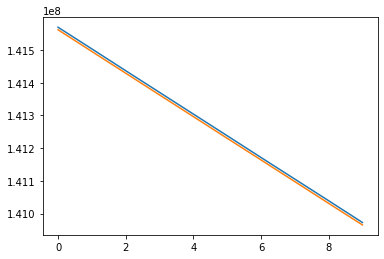

In [181]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# Multi layer LSTM model 7

HL 1 --> 10 LSTM neurons

HL 2 --> 5

Output Layer --> dense layer 1 neuron activation => linear

In [182]:
model = keras.Sequential()

# Adding LSTM layers
model.add(keras.layers.LSTM(units=10,return_sequences = True, 
                            input_shape= (X_train.shape[1],X_train.shape[2])))

model.add(keras.layers.LSTM(units=5,return_sequences = False))
# Adding the output layer
model.add( keras.layers.Dense(1, activation='linear'))

# Compiling the LSTM
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [183]:
history = model.fit(X_train, Y_train, validation_split=0.3,epochs = 10, batch_size = 10)

Epoch 1/10
2800/2800 [==============================] - 25s 8ms/step - loss: 141341232.0000 - val_loss: 141153360.0000
Epoch 2/10
2800/2800 [==============================] - 17s 6ms/step - loss: 140928384.0000 - val_loss: 140754736.0000
Epoch 3/10
2800/2800 [==============================] - 16s 6ms/step - loss: 140531088.0000 - val_loss: 140358192.0000
Epoch 4/10
2800/2800 [==============================] - 14s 5ms/step - loss: 140134928.0000 - val_loss: 139962352.0000
Epoch 5/10
2800/2800 [==============================] - 20s 7ms/step - loss: 139739376.0000 - val_loss: 139567120.0000
Epoch 6/10
2800/2800 [==============================] - 17s 6ms/step - loss: 139344192.0000 - val_loss: 139172256.0000
Epoch 7/10
2800/2800 [==============================] - 17s 6ms/step - loss: 138949744.0000 - val_loss: 138777952.0000
Epoch 8/10
2800/2800 [==============================] - 17s 6ms/step - loss: 138555872.0000 - val_loss: 138384464.0000
Epoch 9/10
2800/2800 [==========================

In [184]:
# Saving model to disk
model.save("model_multilayer.h5")

#from tensorflow.keras.models import load_model

# Loading model to compare the results
#model = load_model('model.h5')

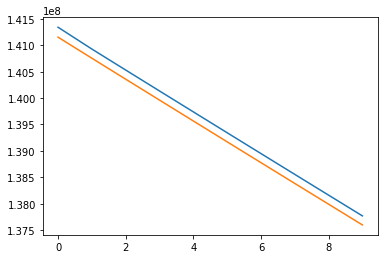

In [185]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])